# **Transformación del Dataset**

In [2]:
import pandas as pd

# Cargar y limpiar cada conjunto de datos con columnas adicionales para 'Año' y 'Lugar'
def load_and_clean_data_with_location(file_path, location_name):
    data = pd.ExcelFile(file_path).parse(sheet_name=0, skiprows=1)
    data.columns = data.iloc[0]
    data = data[1:]

    # Eliminar columnas vacías
    data = data.dropna(axis=1, how='all')

    # Reiniciar el índice
    data.reset_index(drop=True, inplace=True)

    # Renombrar columnas
    data.columns = [
        'Nombre Agricultor', 'Fecha Liquidacion', 'Estado', 'Producto', 'Variedad',
        'Calidad', 'Cantidad de Sacos', 'Cantidad en Peso', 'Valor de Compra'
    ]

    # Convertir 'Fecha Liquidacion' a formato datetime
    data['Fecha Liquidacion'] = pd.to_datetime(data['Fecha Liquidacion'], errors='coerce')

    # Eliminar filas con fechas faltantes
    data = data.dropna(subset=['Fecha Liquidacion'])

    # Eliminar filas duplicadas
    data = data.drop_duplicates()

    # Convertir columnas numéricas a su tipo correcto
    numerical_columns = ['Cantidad de Sacos', 'Cantidad en Peso', 'Valor de Compra']
    data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

    # Eliminar filas con valores faltantes en columnas numéricas
    data = data.dropna(subset=numerical_columns)

    # Añadir columnas 'Año' y 'Lugar'
    data['Año'] = data['Fecha Liquidacion'].dt.year
    data['Lugar'] = location_name

    # Filtrar filas con 'Valor de Compra' menor a 30
    data_filtered = data[data['Valor de Compra'] >= 30]

    return data

# Cargar y limpiar cada archivo
junin_cleaned = load_and_clean_data_with_location('/content/drive/MyDrive/Junin.xlsx', 'Junin')
andahuaylas_cleaned = load_and_clean_data_with_location('/content/drive/MyDrive/Andahuaylas.xlsx', 'Andahuaylas')
ica_cleaned = load_and_clean_data_with_location('/content/drive/MyDrive/Ica.xlsx', 'Ica')
lima_cleaned = load_and_clean_data_with_location('/content/drive/MyDrive/Lima.xlsx', 'Lima')
ayacucho_cleaned = load_and_clean_data_with_location('/content/drive/MyDrive/Ayacucho.xlsx', 'Ayacucho')


# Combinar todos los conjuntos de datos limpios
combined_data = pd.concat([junin_cleaned, andahuaylas_cleaned, ica_cleaned, lima_cleaned, ayacucho_cleaned], ignore_index=True)

# Guardar los datos combinados en un archivo CSV
combined_data.to_csv('combined_cleaned_data_with_location.csv', index=False)


In [3]:
import pandas as pd

# Cargar los datos de entrenamiento
data_train = pd.read_csv('combined_cleaned_data_with_location.csv')

# Mostrar las primeras filas del DataFrame para ver el orden y las columnas
print(data_train.head())

# Mostrar los nombres de las columnas
print(data_train.columns)


       Nombre Agricultor Fecha Liquidacion     Estado Producto Variedad  \
0  ANTONIO CASO VALENCIA        2023-03-23  Cancelado     Papa   Yungay   
1  ANTONIO CASO VALENCIA        2023-10-21  Cancelado     Papa    Negra   
2  ANTONIO CASO VALENCIA        2023-10-21  Cancelado     Papa   Yungay   
3  ANTONIO CASO VALENCIA        2023-10-21  Cancelado     Papa   Yungay   
4  ANTONIO CASO VALENCIA        2023-11-10  Cancelado     Papa   Yungay   

  Calidad  Cantidad de Sacos  Cantidad en Peso  Valor de Compra   Año  Lugar  
0       I                 89             10460         10773.80  2023  Junin  
1       I                 14              1604          2566.40  2023  Junin  
2       I                 77              9005          8554.75  2023  Junin  
3      II                  8               920           552.00  2023  Junin  
4       I                 98             11957         14946.25  2023  Junin  
Index(['Nombre Agricultor', 'Fecha Liquidacion', 'Estado', 'Producto',
    

In [4]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('combined_cleaned_data_with_location.csv')


# Convertir 'Fecha Liquidacion' a Formato de Fecha y Extraer 'Semana'
data['Fecha Liquidacion'] = pd.to_datetime(data['Fecha Liquidacion'])
data['Semana'] = data['Fecha Liquidacion'].dt.isocalendar().week

# Mostrar las primeras filas del DataFrame para revisar la estructura
print(data.head())


       Nombre Agricultor Fecha Liquidacion     Estado Producto Variedad  \
0  ANTONIO CASO VALENCIA        2023-03-23  Cancelado     Papa   Yungay   
1  ANTONIO CASO VALENCIA        2023-10-21  Cancelado     Papa    Negra   
2  ANTONIO CASO VALENCIA        2023-10-21  Cancelado     Papa   Yungay   
3  ANTONIO CASO VALENCIA        2023-10-21  Cancelado     Papa   Yungay   
4  ANTONIO CASO VALENCIA        2023-11-10  Cancelado     Papa   Yungay   

  Calidad  Cantidad de Sacos  Cantidad en Peso  Valor de Compra   Año  Lugar  \
0       I                 89             10460         10773.80  2023  Junin   
1       I                 14              1604          2566.40  2023  Junin   
2       I                 77              9005          8554.75  2023  Junin   
3      II                  8               920           552.00  2023  Junin   
4       I                 98             11957         14946.25  2023  Junin   

   Semana  
0      12  
1      42  
2      42  
3      42  
4      4

In [5]:
# Agrupar por Semana y Calcular el Costo Total Semanal
weekly_data = data.groupby(['Año', 'Semana']).agg({
    'Producto': 'first',
    'Variedad': 'first',
    'Calidad': 'first',
    'Lugar': 'first',
    'Cantidad en Peso': 'sum',
    'Cantidad de Sacos': 'mean',
    'Valor de Compra': 'sum'
}).reset_index()

# Mostrar las primeras filas del DataFrame agrupado
print(weekly_data.head())


    Año  Semana Producto Variedad Calidad     Lugar  Cantidad en Peso  \
0  2021       3     Papa  Canchan       I  Ayacucho             31853   
1  2021       5     Papa  Canchan       I  Ayacucho             75916   
2  2021       6     Papa  Canchan       I  Ayacucho             62954   
3  2021       7     Papa  Canchan       I  Ayacucho             16957   
4  2021       8     Papa  Canchan       I  Ayacucho             48409   

   Cantidad de Sacos  Valor de Compra  
0         148.500000         25427.73  
1          57.230769         51571.28  
2          55.454545         38922.20  
3          42.000000          9033.25  
4          43.545455         31207.40  


# **Identificación de los outliers**

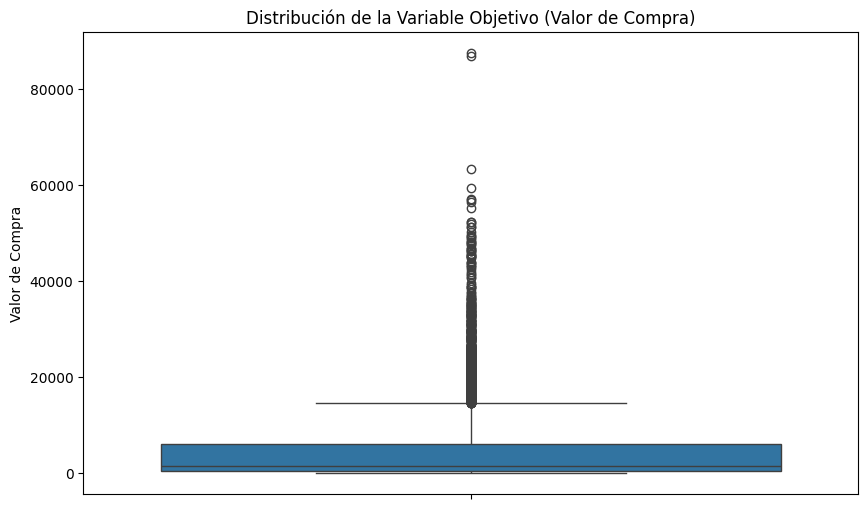

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.boxplot(data['Valor de Compra'])
plt.title('Distribución de la Variable Objetivo (Valor de Compra)')
plt.show()

# Identificar outliers usando el rango intercuartílico (IQR)
Q1 = data['Valor de Compra'].quantile(0.25)
Q3 = data['Valor de Compra'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar outliers
data_filtered = data[(data['Valor de Compra'] >= lower_bound) & (data['Valor de Compra'] <= upper_bound)]


In [18]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('combined_cleaned_data_with_location.csv')

# Filtrar los datos para identificar outliers y no outliers
outliers = data[(data['Valor de Compra'] < lower_bound) | (data['Valor de Compra'] > upper_bound)]
non_outliers = data[(data['Valor de Compra'] >= lower_bound) & (data['Valor de Compra'] <= upper_bound)]

# Contar el número de outliers y no outliers
num_outliers = outliers.shape[0]
num_non_outliers = non_outliers.shape[0]

print(f'Número de Outliers: {num_outliers}')
print(f'Número de No Outliers: {num_non_outliers}')


Número de Outliers: 585
Número de No Outliers: 4918


# **Entrenamiento de la data histórica**

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir las características y la variable objetivo
features = ['Semana', 'Producto', 'Variedad', 'Calidad', 'Lugar', 'Cantidad en Peso', 'Cantidad de Sacos']
target = 'Valor de Compra'

# Definir transformaciones para columnas categóricas y numéricas
numeric_features = ['Cantidad en Peso', 'Cantidad de Sacos']
categorical_features = ['Semana', 'Producto', 'Variedad', 'Calidad', 'Lugar']

# Crear preprocesador con manejo de categorías desconocidas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear pipeline con Ridge Regression
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])

# Dividir los datos en conjuntos de entrenamiento (2021 y 2022) y prueba (2023) usando solo no outliers
train_data = non_outliers[(non_outliers['Año'] == 2021) | (non_outliers['Año'] == 2022)]
test_data = non_outliers[non_outliers['Año'] == 2023]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Entrenar el modelo
pipeline_ridge.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline_ridge.predict(X_train)
y_test_pred = pipeline_ridge.predict(X_test)

# Evaluar el rendimiento del modelo en los datos de prueba
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test RMSE : {test_rmse}')
print(f'Test MAE : {test_mae}')
print(f'Test R2 : {test_r2}')


Test RMSE : 1377.1570039834462
Test MAE : 949.929276226089
Test R2 : 0.8501031459638589


In [9]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 folds usando solo no outliers
cv_scores = cross_val_score(pipeline_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir las puntuaciones a RMSE
cv_rmse_scores = (-cv_scores) ** 0.5

print(f'Cross-Validation RMSE Scores: {cv_rmse_scores}')
print(f'Mean RMSE: {cv_rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {cv_rmse_scores.std()}')


Cross-Validation RMSE Scores: [1857.96667389 1084.97612964 1094.89916374  991.27223155 1033.89597028]
Mean RMSE: 1212.602033821107
Standard Deviation of RMSE: 324.8262902599873


In [10]:
import matplotlib.pyplot as plt

# Obtener las predicciones para los datos de prueba
y_test_pred = pipeline_ridge.predict(X_test)

# Crear un DataFrame con las predicciones y los valores reales
comparison_df = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': y_test_pred
})

# Mostrar las primeras filas del DataFrame de comparación
comparison_df.head(35)


,Valor Real,Predicción
0,10773.80,10799.343183
1,2566.40,182.882509
2,8554.75,7168.346740
3,552.00,-1600.577607
5,676.65,-1173.025810
7,77.35,-2034.096914
8,13034.24,8705.390068
9,1372.70,-196.067014
10,3167.10,1339.425378
11,10890.00,7334.458979


In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Cargar los datos
data = pd.DataFrame({
    "Valor Real": [10773.80, 2566.40, 8554.75, 552.00, 676.65, 77.35, 13034.24, 1372.70, 3167.10, 10890.00, 746.20, 2361.60, 481.80, 3227.40, 13054.47, 2094.00, 10885.00, 591.60, 2556.00, 5614.00, 11199.90, 13293.00, 669.00, 319.20, 5446.70, 510.00, 664.00, 9911.75, 812.50, 426.40],
    "Predicción": [10799.34, 182.88, 7168.35, -1600.58, -1173.03, -2034.10, 8705.39, -196.07, 1339.43, 7334.46, -935.24, -742.07, -1070.61, 193.54, 6980.79, 54.24, 4177.14, 714.84, 1140.55, 3880.36, 6138.30, 7722.71, 11.86, 3029.13, 2727.73, 231.28, 414.49, 5010.13, 210.76, -976.03]
})

# Ajustar las predicciones para evitar valores negativos
data["Predicción Ajustada"] = np.maximum(data["Predicción"], 0)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(data["Valor Real"], data["Predicción Ajustada"])

print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Mostrar el DataFrame ajustado
data


Coeficiente de Determinación (R²): 0.62


,Valor Real,Predicción,Predicción Ajustada
0,10773.80,10799.34,10799.34
1,2566.40,182.88,182.88
2,8554.75,7168.35,7168.35
3,552.00,-1600.58,0.00
4,676.65,-1173.03,0.00
5,77.35,-2034.10,0.00
6,13034.24,8705.39,8705.39
7,1372.70,-196.07,0.00
8,3167.10,1339.43,1339.43
9,10890.00,7334.46,7334.46


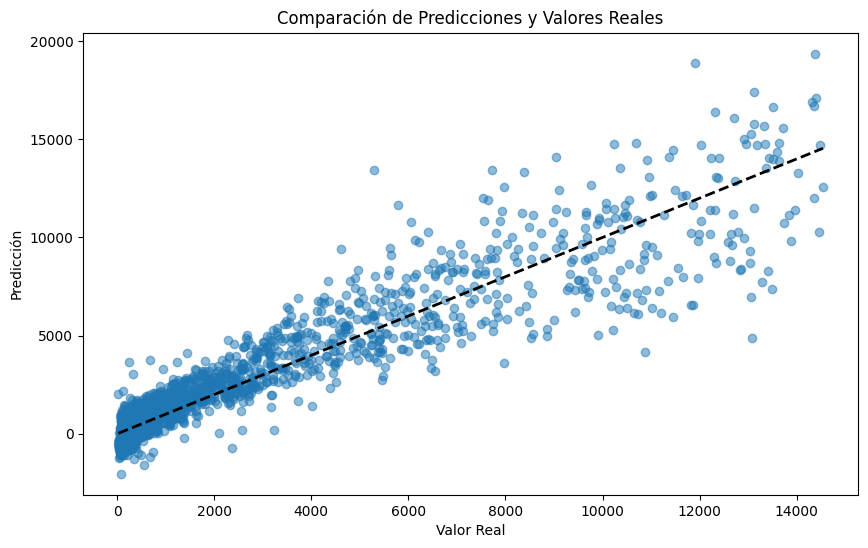

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Predicciones y Valores Reales')
plt.show()


In [13]:
# Crear un DataFrame con las predicciones y los valores reales
comparison_df = pd.DataFrame({
    'Semana': test_data['Semana'],
    'Valor Real': y_test,
    'Predicción': y_test_pred
})

# Agrupar por semana y calcular los totales semanales
weekly_comparison = comparison_df.groupby('Semana').sum().reset_index()

# Mostrar las primeras filas del DataFrame de comparación semanal
print(weekly_comparison.head(10))

   Semana  Valor Real     Predicción
0       8    46248.07   30751.106614
1       9   132446.70   93841.735940
2      10   138602.63  123131.960071
3      11    68828.70   52559.636391
4      12   111178.11   87003.877828
5      13    78512.28   87143.095152
6      14    66504.00   63337.282382
7      15   112514.12  100081.176663
8      16   210154.54  205609.955994
9      17   146612.12  106708.220678


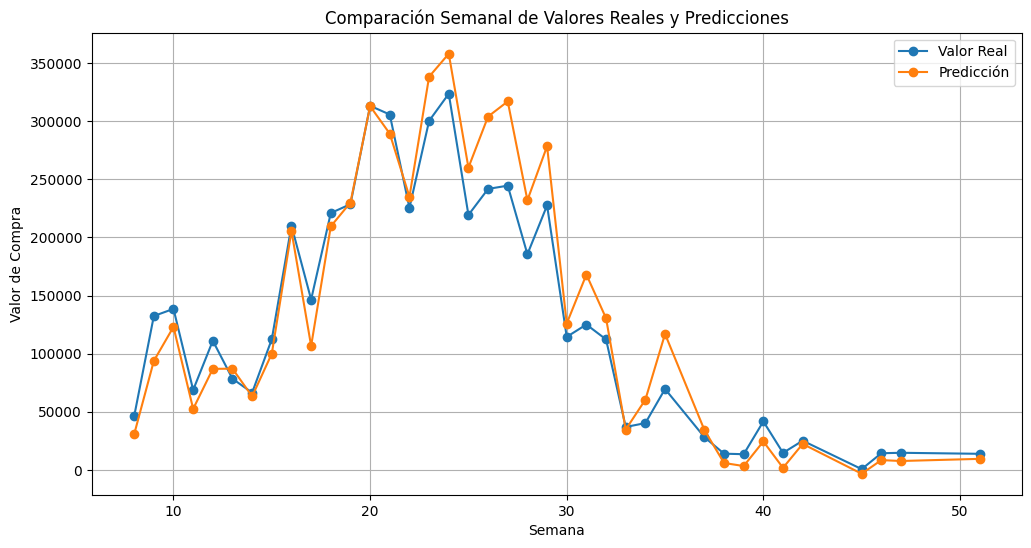

In [14]:
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones y los valores reales
comparison_df = pd.DataFrame({
    'Semana': test_data['Semana'],
    'Valor Real': y_test,
    'Predicción': y_test_pred
})

# Agrupar por semana y calcular los totales semanales
weekly_comparison = comparison_df.groupby('Semana').sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(weekly_comparison['Semana'], weekly_comparison['Valor Real'], marker='o', label='Valor Real')
plt.plot(weekly_comparison['Semana'], weekly_comparison['Predicción'], marker='o', label='Predicción')
plt.xlabel('Semana')
plt.ylabel('Valor de Compra')
plt.title('Comparación Semanal de Valores Reales y Predicciones')
plt.legend()
plt.grid(True)
plt.show()


# **Predicción 2024**

In [15]:
# Definir escenarios de predicción con categorías válidas para 2024
escenarios_2024 = {
    'Semana': [15, 16, 17, 18, 19],  # Ejemplo de semanas futuras
    'Producto': ['Papa', 'Papa', 'Papa', 'Papa', 'Papa'],
    'Variedad': ['Canchan', 'Huayro', 'Canchan', 'Yungay', 'Canchan'],
    'Calidad': ['I', 'II', 'I', 'II', 'I'],
    'Lugar': ['Junin', 'Ayacucho', 'Ayacucho', 'Junin', 'Ayacucho'],
    'Cantidad en Peso': [10230, 19100, 3150, 12290, 7530],
    'Cantidad de Sacos': [101, 190, 30, 120, 70]
}

df_prediccion_2024 = pd.DataFrame(escenarios_2024)


In [16]:
# Realizar predicciones con el modelo entrenado
y_pred_2024 = pipeline_ridge.predict(df_prediccion_2024)

# Añadir las predicciones al DataFrame de predicción
df_prediccion_2024['Prediccion Valor de Compra'] = y_pred_2024

# Mostrar los resultados de las predicciones
print(df_prediccion_2024)


   Semana Producto Variedad Calidad     Lugar  Cantidad en Peso  \
0      15     Papa  Canchan       I     Junin             10230   
1      16     Papa   Huayro      II  Ayacucho             19100   
2      17     Papa  Canchan       I  Ayacucho              3150   
3      18     Papa   Yungay      II     Junin             12290   
4      19     Papa  Canchan       I  Ayacucho              7530   

   Cantidad de Sacos  Prediccion Valor de Compra  
0                101                10668.953948  
1                190                16484.351840  
2                 30                 3069.684295  
3                120                11034.499496  
4                 70                 7733.147697  


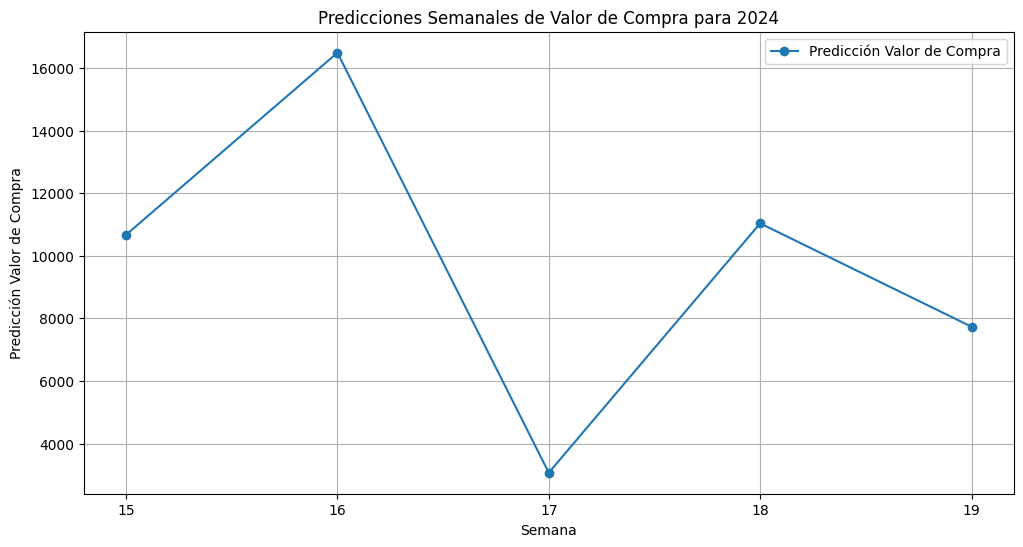

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que los valores de la columna 'Semana' son enteros
df_prediccion_2024['Semana'] = df_prediccion_2024['Semana'].astype(int)

# Crear el gráfico de líneas para las predicciones de 2024
plt.figure(figsize=(12, 6))
plt.plot(df_prediccion_2024['Semana'], df_prediccion_2024['Prediccion Valor de Compra'], marker='o', label='Predicción Valor de Compra')
plt.xlabel('Semana')
plt.ylabel('Predicción Valor de Compra')
plt.title('Predicciones Semanales de Valor de Compra para 2024')
plt.xticks(df_prediccion_2024['Semana'])  # Asegurarse de que los valores en el eje X son enteros
plt.legend()
plt.grid(True)
plt.show()
